In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from src.gebpy.core.rocks.sedimentary import SedimentaryRocks

In [3]:
n_datasets = 1000

data_sandstone = SedimentaryRocks(name="Sandstone", random_seed=42).generate_dataset(number=n_datasets)
data_limestone = SedimentaryRocks(name="Limestone", random_seed=42).generate_dataset(number=n_datasets)

In [4]:
data_sandstone

,rho,K,G,GR,PE,porosity,rho_s,rho_f,vS,vP,...,w.MnO,w.NiO,w.H2O,w.Fe2O3,w.SO3,phi.Quartz,phi.Alkali feldspar,phi.Plagioclase,phi.Chlorite,phi.Pyrite
0,2386.384590,47.207910,49.097005,1.241412,2.651984,0.209720,2754.294561,1000.0,4535.835377,6871.238998,...,0.001197,0.000379,0.004978,0.035421,0.048622,0.891267,0.010934,0.017881,0.043488,0.036430
1,2154.518841,44.277554,47.881733,0.499104,2.117496,0.314649,2684.566959,1000.0,4714.219285,7083.984420,...,0.004351,0.000113,0.001823,0.008677,0.012864,0.905892,0.009409,0.058176,0.016885,0.009638
2,2290.063291,44.988236,50.739918,2.195096,2.727623,0.274342,2777.784168,1000.0,4707.075231,7013.348085,...,0.000923,0.001506,0.000673,0.035961,0.070124,0.914124,0.019829,0.006834,0.006673,0.052540
3,2533.771682,48.457912,51.592277,0.101958,2.501691,0.123544,2749.970645,1000.0,4512.410599,6802.495619,...,0.000399,0.000244,0.001160,0.029486,0.056877,0.852018,0.018328,0.077367,0.009673,0.042615
4,2119.361485,47.656917,49.652637,1.357004,2.295832,0.343906,2706.098184,1000.0,4840.259414,7329.661127,...,0.001166,0.003612,0.001772,0.015663,0.029414,0.861386,0.095746,0.004600,0.016230,0.022038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2262.534413,48.733410,46.277760,4.173671,2.489743,0.259753,2705.559247,1000.0,4522.604040,6986.503481,...,0.001958,0.002867,0.009328,0.024951,0.011627,0.875110,0.019322,0.015177,0.081679,0.008711
996,2602.930002,48.108715,49.473350,1.531716,2.930589,0.100577,2782.176291,1000.0,4359.678021,6620.038792,...,0.009665,0.002484,0.004007,0.036891,0.061031,0.898008,0.008644,0.008835,0.038785,0.045727
997,2158.299656,45.676243,51.244524,1.708145,2.689011,0.348342,2777.465907,1000.0,4872.679666,7267.765210,...,0.000122,0.000584,0.000497,0.035912,0.070447,0.899843,0.022093,0.020815,0.004467,0.052782
998,2396.047591,45.906028,46.816593,2.763791,2.247237,0.170224,2682.439301,1000.0,4420.304475,6723.926358,...,0.001280,0.002497,0.003328,0.014760,0.005030,0.901146,0.031796,0.031075,0.032215,0.003769


In [5]:
data_sandstone.head()
data_sandstone.info()
data_sandstone.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rho                  1000 non-null   float64
 1   K                    1000 non-null   float64
 2   G                    1000 non-null   float64
 3   GR                   1000 non-null   float64
 4   PE                   1000 non-null   float64
 5   porosity             1000 non-null   float64
 6   rho_s                1000 non-null   float64
 7   rho_f                1000 non-null   float64
 8   vS                   1000 non-null   float64
 9   vP                   1000 non-null   float64
 10  vP/vS                1000 non-null   float64
 11  E                    1000 non-null   float64
 12  poisson              1000 non-null   float64
 13  lame                 1000 non-null   float64
 14  w.O                  1000 non-null   float64
 15  w.Si                 1000 non-null   fl

,count,mean,std,min,25%,50%,75%,max
rho,1000.0,2341.968102,129.786708,2.081426e+03,2234.369797,2342.014133,2444.917862,2610.467011
K,1000.0,47.105709,2.883866,3.918024e+01,45.251831,47.040803,48.854775,56.542942
G,1000.0,48.807798,1.634676,4.433861e+01,47.624940,48.804494,50.247618,51.940722
GR,1000.0,3.222189,3.456080,4.958154e-04,0.805735,2.008472,4.511087,21.511435
PE,1000.0,2.518272,0.316300,1.842745e+00,2.263934,2.525532,2.742184,3.505123
porosity,1000.0,0.224116,0.072945,1.003083e-01,0.159582,0.223517,0.289612,0.349776
rho_s,1000.0,2729.633896,40.647966,2.649491e+03,2695.587389,2727.890094,2769.325537,2824.644832
rho_f,1000.0,1000.000000,0.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
vS,1000.0,4569.464264,138.665290,4.229763e+03,4459.241704,4562.804106,4678.791671,4895.258341
vP,1000.0,6927.692555,203.309667,6.424602e+03,6765.377674,6921.920529,7099.133892,7364.991603


In [6]:
data_limestone

,rho,K,G,GR,PE,porosity,rho_s,rho_f,vS,vP,...,w.Fe2O3,w.SO3,phi.Calcite,phi.Dolomite,phi.Quartz,phi.Alkali feldspar,phi.Plagioclase,phi.Kaolinite,phi.Illite,phi.Pyrite
0,2407.901337,82.358737,39.927949,1.972104,5.480291,0.231664,2832.402073,1000.0,4072.106777,7504.194795,...,0.035543,0.071276,0.863312,0.002347,0.003839,0.009336,0.007821,0.051306,0.008637,0.053403
1,2101.906593,75.792169,34.154556,9.425422,4.624740,0.357579,2715.241622,1000.0,4031.044715,7597.666302,...,0.001734,0.003477,0.828563,0.016304,0.029905,0.028314,0.009758,0.009529,0.075023,0.002605
2,2201.199809,81.042893,37.479604,4.033804,4.734833,0.309210,2738.879428,1000.0,4126.366141,7714.929018,...,0.007040,0.014118,0.814441,0.060960,0.007622,0.033578,0.007421,0.062403,0.002998,0.010578
3,2547.774039,79.492875,37.525578,5.299848,4.965011,0.128253,2775.485780,1000.0,3837.807955,7130.166360,...,0.018863,0.037826,0.814214,0.027031,0.016945,0.030335,0.003025,0.031525,0.048583,0.028341
4,2094.414905,81.111968,39.439688,3.653965,5.145641,0.392687,2802.059851,1000.0,4339.456873,7989.717990,...,0.027326,0.054799,0.816332,0.009657,0.013449,0.005421,0.046391,0.033823,0.033870,0.041058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2294.459071,79.874107,39.191215,15.120174,5.423376,0.291704,2827.568198,1000.0,4132.893412,7588.553767,...,0.034320,0.068824,0.826220,0.002264,0.011269,0.046536,0.012709,0.001449,0.047988,0.051566
996,2597.784262,79.587784,37.617375,9.955193,4.933601,0.100693,2776.683166,1000.0,3805.333307,7067.121790,...,0.013254,0.026579,0.801984,0.018216,0.010428,0.022424,0.063102,0.007293,0.056638,0.019914
997,2102.985397,81.232963,39.571466,1.091915,5.469598,0.398011,2832.233764,1000.0,4337.834112,7982.263009,...,0.035057,0.070303,0.858993,0.015024,0.016650,0.005411,0.008641,0.036230,0.006378,0.052674
998,2414.850758,79.122275,37.533274,7.864902,4.719384,0.184269,2734.457330,1000.0,3942.421683,7313.580270,...,0.008966,0.017979,0.809750,0.017704,0.029889,0.062574,0.002023,0.041620,0.022968,0.013471


In [7]:
data_limestone.head()
data_limestone.info()
data_limestone.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rho                  1000 non-null   float64
 1   K                    1000 non-null   float64
 2   G                    1000 non-null   float64
 3   GR                   1000 non-null   float64
 4   PE                   1000 non-null   float64
 5   porosity             1000 non-null   float64
 6   rho_s                1000 non-null   float64
 7   rho_f                1000 non-null   float64
 8   vS                   1000 non-null   float64
 9   vP                   1000 non-null   float64
 10  vP/vS                1000 non-null   float64
 11  E                    1000 non-null   float64
 12  poisson              1000 non-null   float64
 13  lame                 1000 non-null   float64
 14  w.C                  1000 non-null   float64
 15  w.O                  1000 non-null   fl

,count,mean,std,min,25%,50%,75%,max
rho,1000.0,2326.679822,156.307504,2.034813e+03,2189.944324,2326.562459,2456.056637,2649.969911
K,1000.0,79.133859,1.907363,7.234306e+01,77.937661,79.245793,80.520505,84.166994
G,1000.0,37.458630,1.584665,3.301806e+01,36.230504,37.498346,38.638258,41.722168
GR,1000.0,5.337194,3.660942,7.111485e-02,2.558238,4.588194,7.308243,21.150751
PE,1000.0,4.964260,0.288331,4.477515e+00,4.739408,4.899927,5.138513,5.714729
porosity,1000.0,0.248940,0.087533,1.003699e-01,0.171499,0.248220,0.327534,0.399731
rho_s,1000.0,2766.556114,39.342397,2.697063e+03,2733.763091,2757.883299,2793.316276,2846.877889
rho_f,1000.0,1000.000000,0.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
vS,1000.0,4017.987800,150.433695,3.660370e+03,3901.100456,4020.965006,4133.007503,4422.269301
vP,1000.0,7459.768741,261.949384,6.894065e+03,7245.187540,7458.134010,7656.833102,8166.834866


In [8]:
variances = data_sandstone.var().sort_values()
variances

rho_f                  0.000000e+00
w.H                    9.410516e-08
w.Mg                   4.597831e-06
w.K                    4.665863e-06
w.Na                   4.911910e-06
w.K2O                  6.770467e-06
w.H2O                  7.514514e-06
w.Na2O                 8.924864e-06
w.MgO                  1.264364e-05
w.Mn                   1.272734e-05
w.Al                   1.285808e-05
w.Ni                   1.512041e-05
w.Ca                   1.594088e-05
w.MnO                  2.121961e-05
w.NiO                  2.448720e-05
w.CaO                  3.120828e-05
w.Al2O3                4.590247e-05
w.O                    7.013150e-05
w.Si                   7.043834e-05
w.Fe                   7.379019e-05
w.S                    9.102415e-05
w.FeO                  1.221268e-04
w.Fe2O3                1.508375e-04
phi.Pyrite             3.186232e-04
w.SiO2                 3.223766e-04
poisson                4.112095e-04
vP/vS                  5.482459e-04
w.SO3                  5.675

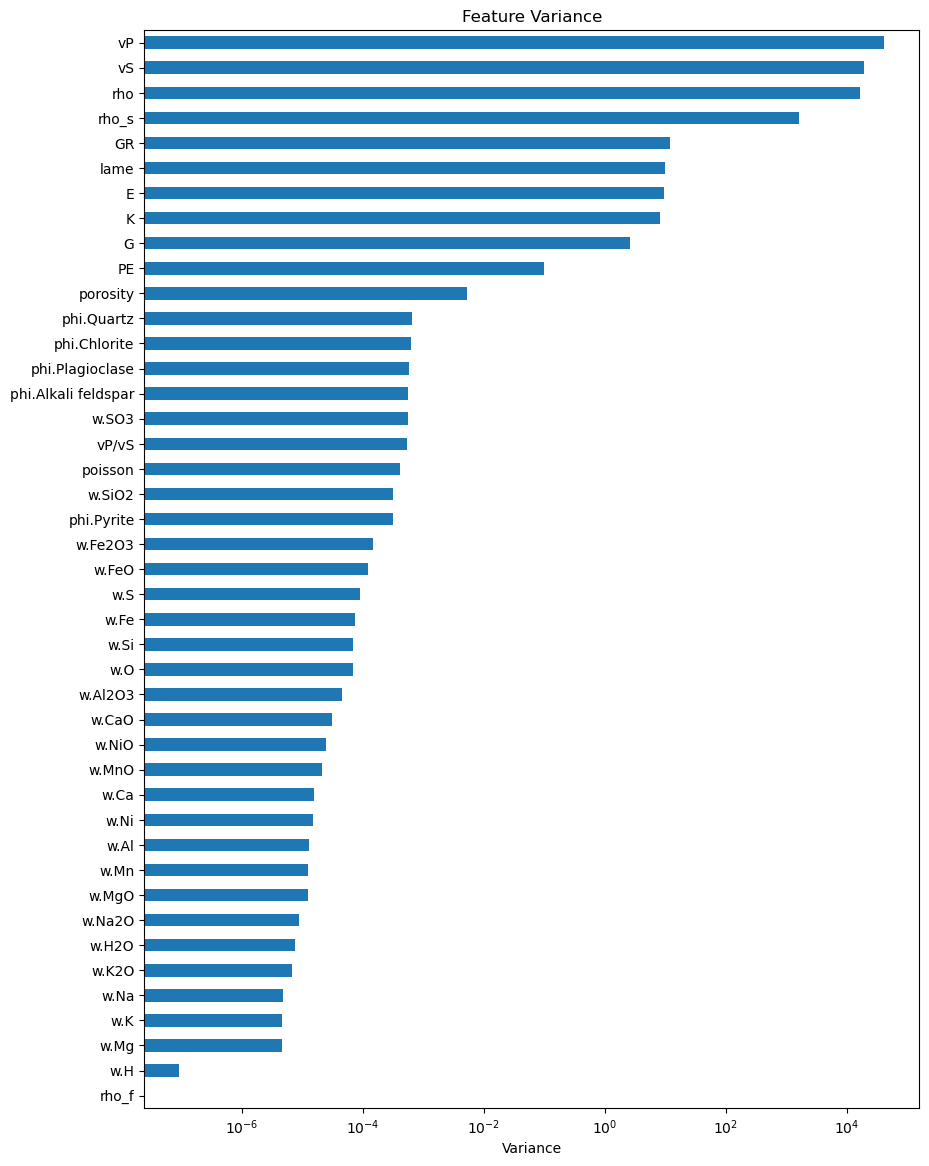

In [9]:
plt.figure(figsize=(10, 14))
variances.plot(kind='barh')
plt.title("Feature Variance")
plt.xlabel("Variance")
plt.xscale("log")
plt.show()

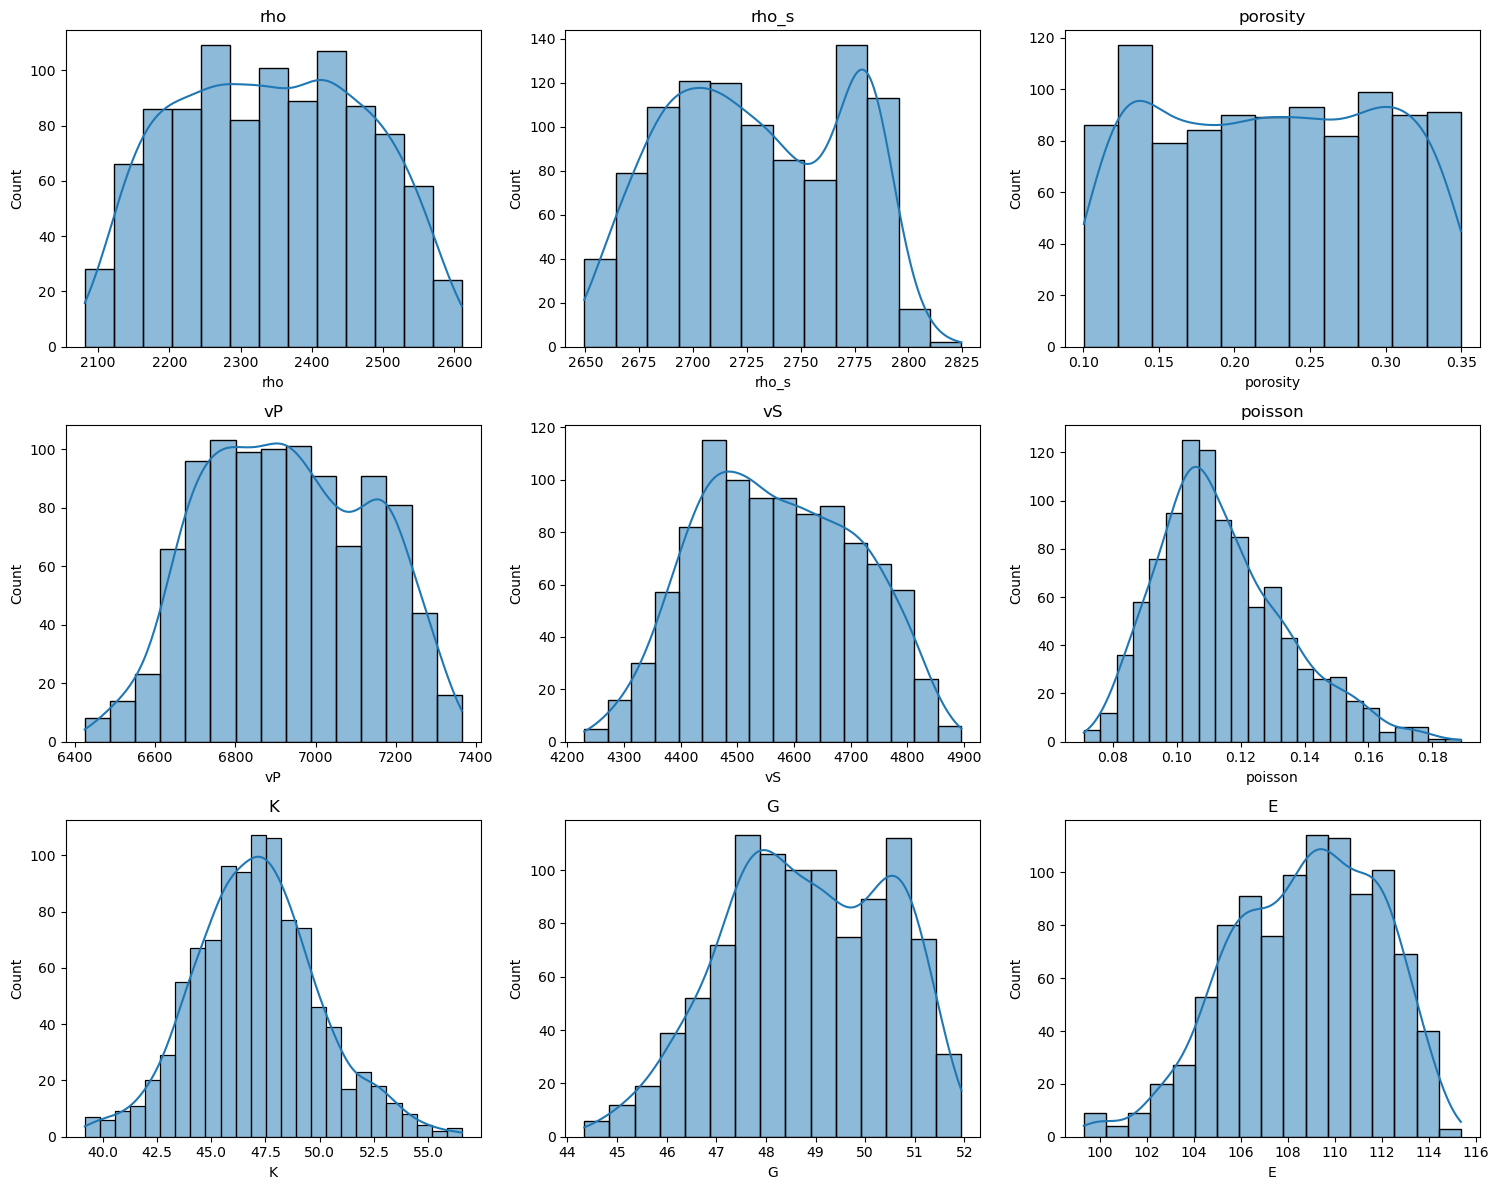

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

columns = ["rho", "rho_s", "porosity", "vP", "vS", "poisson", "K", "G", "E"]

for ax, col in zip(axes, columns):
    sns.histplot(data_sandstone[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()

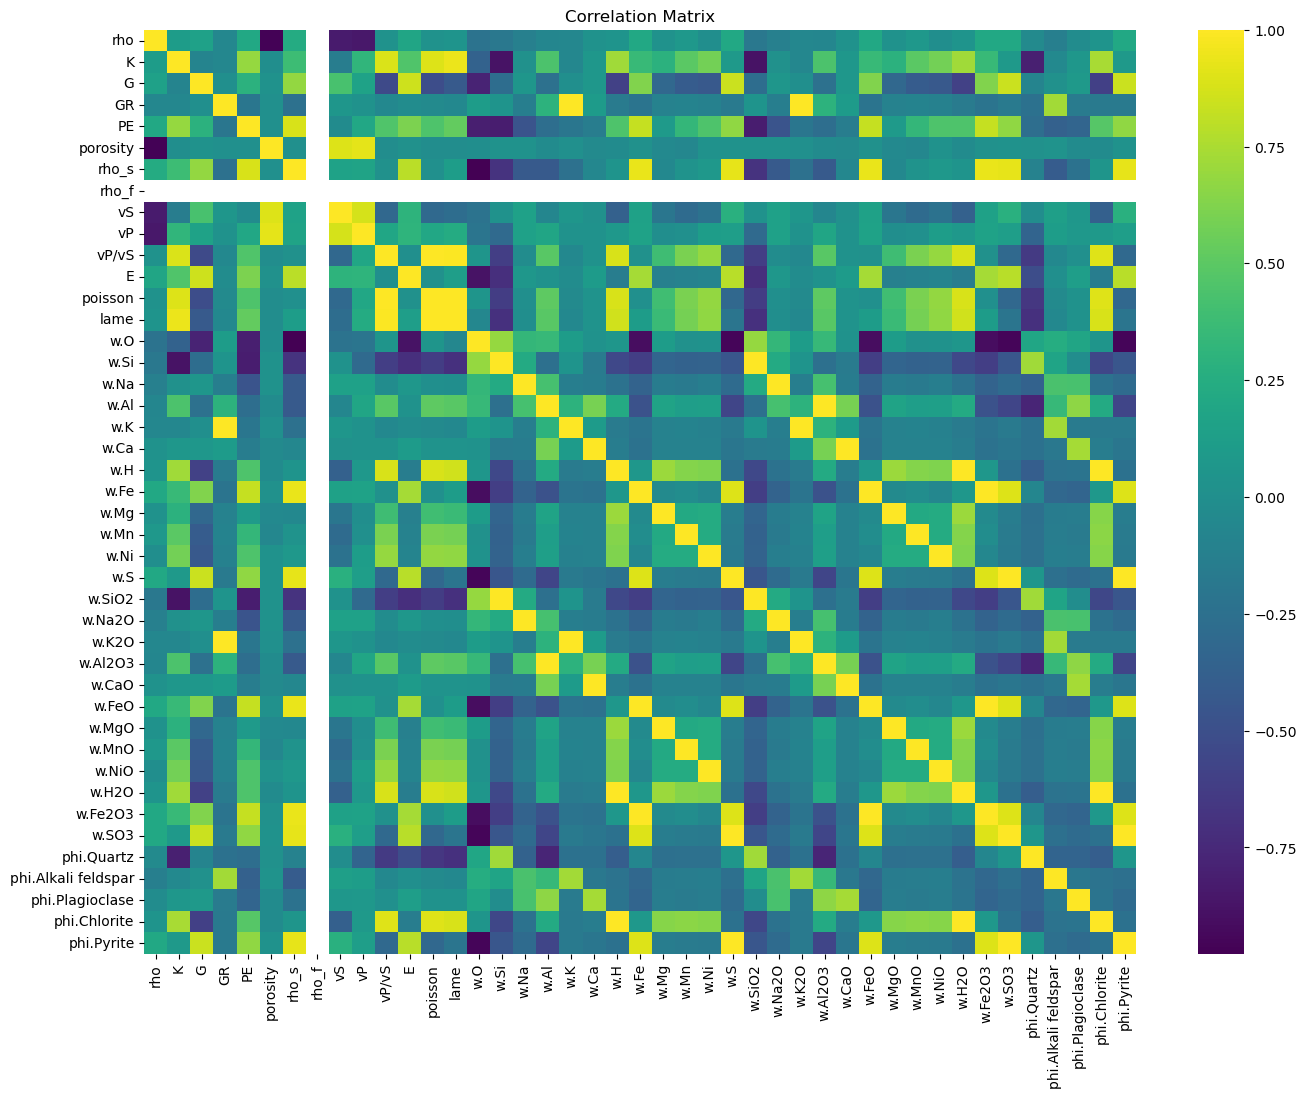

In [11]:
plt.figure(figsize=(16, 12))
corr = data_sandstone.corr()
sns.heatmap(corr, annot=False, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

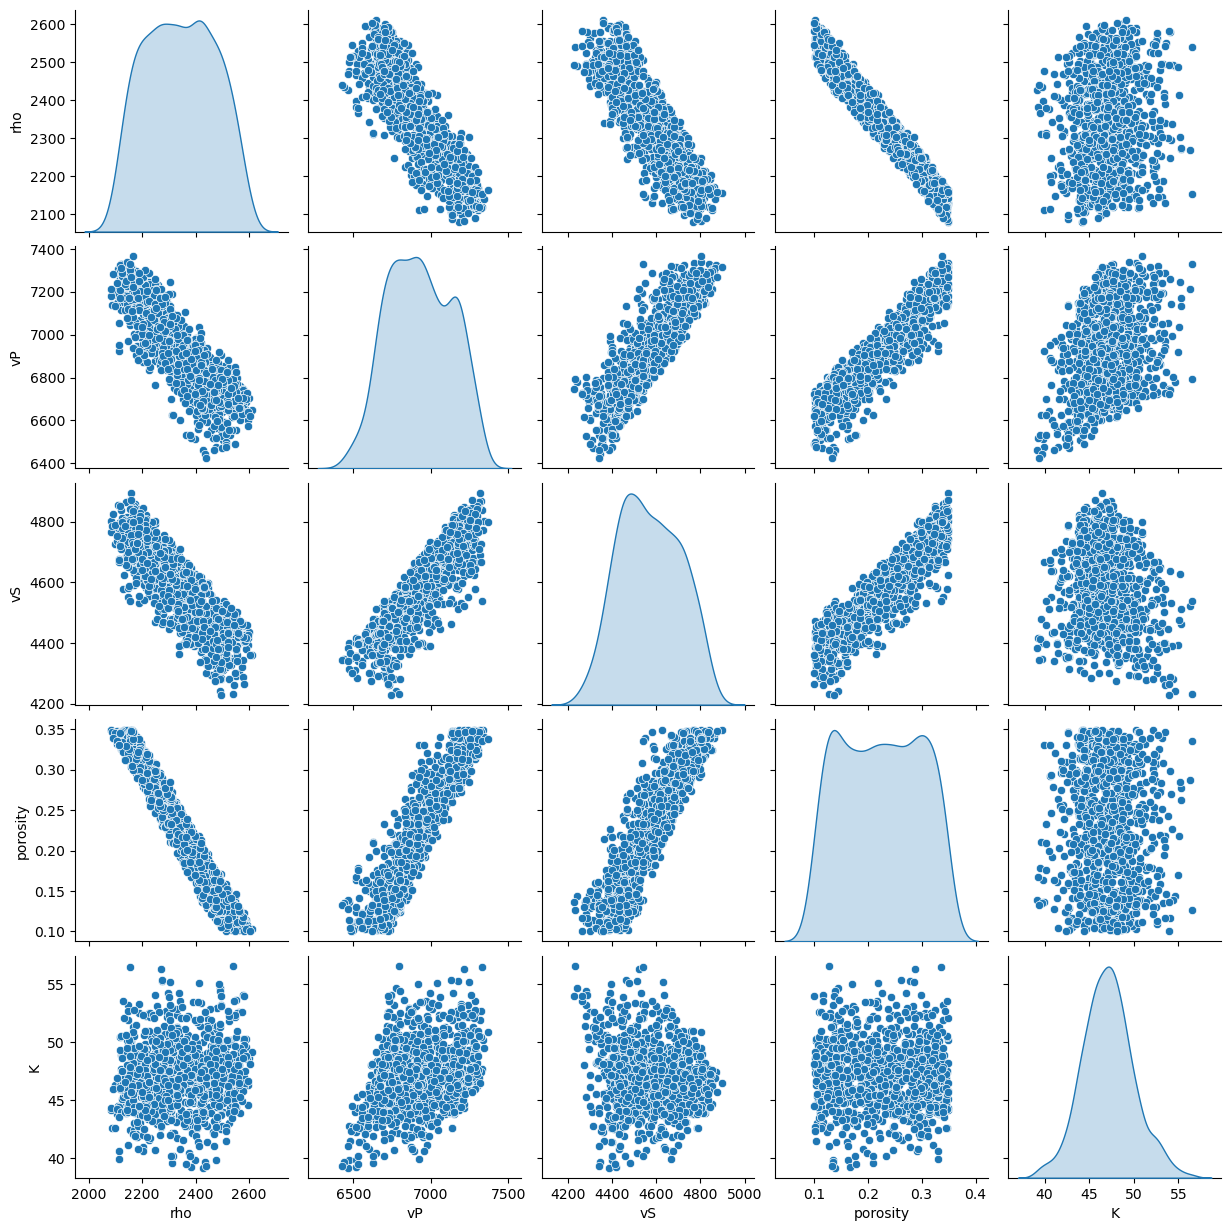

In [12]:
sns.pairplot(data_sandstone[["rho", "vP", "vS", "porosity", "K"]], diag_kind="kde")

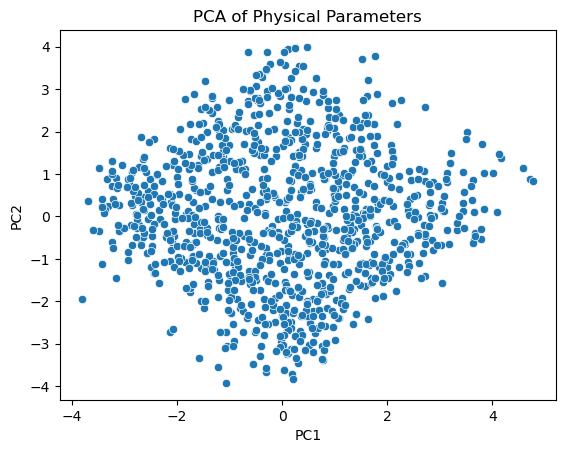

,PC1,PC2
rho,0.289257,-0.534022
rho_s,-0.408400,-0.420233
vP,-0.490081,0.322491
vS,-0.447180,0.365986
w.Si,0.357899,0.369175
w.O,0.425792,0.404955


In [13]:
#X = data_sandstone[["rho", "vP", "vS", "porosity", "E", "G", "K"]]
X = data_sandstone[["rho", "rho_s", "vP", "vS", "w.Si", "w.O"]]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])

sns.scatterplot(x="PC1", y="PC2", data=df_pca)
plt.title("PCA of Physical Parameters")
plt.show()

loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
loadings

In [14]:
# Export dataframe to csv
data_limestone.to_csv("data_limestone_" + str(n_datasets) + ".csv", index=False)